In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import skew, kurtosis
import yfinance as yf 


In [71]:
data = yf.download("^SPX",
                   start="2000-01-01", end="2025-01-01")

[*********************100%***********************]  1 of 1 completed


In [73]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^SPX,^SPX,^SPX,^SPX,^SPX,^SPX
count,6289.000000,6289.000000,6289.000000,6289.000000,6289.000000,6.289000e+03
mean,2112.014193,2112.014193,2123.846701,2098.696135,2111.727483,3.351107e+09
std,1243.313309,1243.313309,1248.723568,1237.150430,1243.102750,1.490823e+09
min,676.530029,676.530029,695.270020,666.789978,679.280029,3.560700e+08
25%,1200.819946,1200.819946,1207.609985,1192.640015,1200.750000,2.197010e+09
50%,1491.560059,1491.560059,1499.099976,1480.280029,1491.469971,3.482580e+09
75%,2748.929932,2748.929932,2764.409912,2736.060059,2752.909912,4.158800e+09
max,6090.270020,6090.270020,6099.970215,6079.979980,6089.029785,1.145623e+10


In [75]:
# Caculate daily returns 
data['Daily Return'] = data['Adj Close'].pct_change().dropna()

In [77]:
# Compute skewness and kurtosis
skewness = skew(data['Daily Return'].dropna())
excess_kurtosis = kurtosis(data['Daily Return'].dropna()) #excess kurtsis 

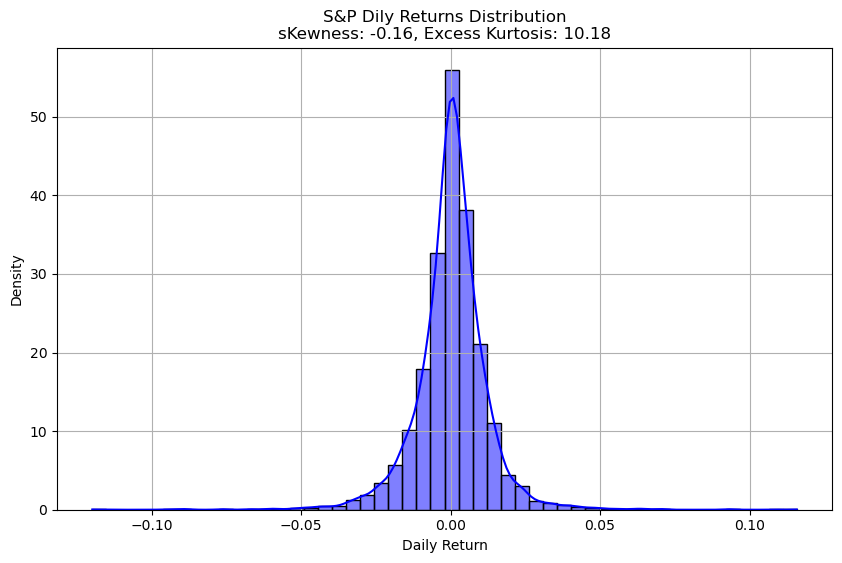

In [79]:
#plot histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(data['Daily Return'].dropna(), bins=50, kde=True, color='blue', stat='density')
plt.title(f"S&P Dily Returns Distribution\nsKewness: {skewness:.2f}, Excess Kurtosis: {excess_kurtosis:.2f}")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed


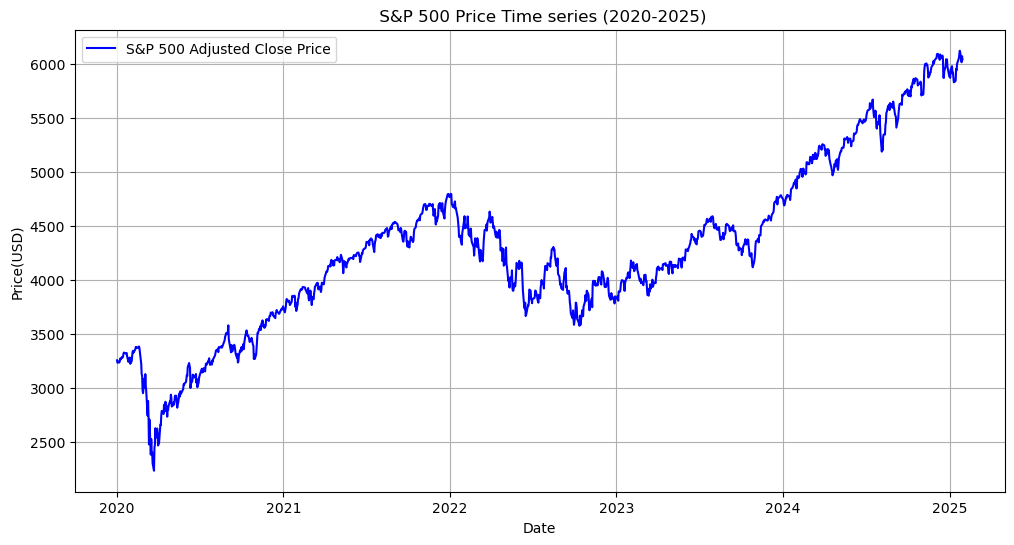

In [83]:
#TIME SERIES CHART 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import yfinance as yf

#Fetch historical data for S&P 500
ticker = '^SPX' # S&P 500 index symbol
start_date = '2020-01-01'
end_date = '2025-01-30'
data = yf.download(ticker, start=start_date, end=end_date)

#convert 'Ajd Close' to a 1D NumPy array 
adj_close_values = data['Adj Close'].squeeze().to_numpy()

# Convert index to NumPy array (ensure it's 1D)
dates = data.index.to_numpy()

#Plot time series of adjusted closing prices
plt.figure(figsize=(12, 6))
sns.lineplot(x=dates, y=adj_close_values, color='blue', label="S&P 500 Adjusted Close Price")

#Formatting 
plt.title(" S&P 500 Price Time series (2020-2025)")
plt.xlabel("Date")
plt.ylabel("Price(USD)")
plt.legend()
plt.grid(True)

#Show the plot
plt.show()

In [87]:
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Step 1: Fetch historical data
stock_data = yf.download("TSLA", start="2010-01-01", end="2025-01-01")
market_data = yf.download("^SPX", start="2010-01-01", end="2025-01-01")

# Step 2: Calculate daily returns
stock_returns = pd.DataFrame({'Returns': stock_data['Close', 'TSLA'].pct_change()})
market_returns = pd.DataFrame({'Market_Returns': market_data['Close', '^SPX'].pct_change()})

# Step 3: Merge the data
data = pd.merge(stock_returns, market_returns,
                left_index=True, right_index=True,
                how='inner').dropna()

# Verify the result
print("Final data shape:", data.shape)
print("\nFirst few rows of merged data:\n", data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Final data shape: (3651, 2)

First few rows of merged data:
                             Returns  Market_Returns
Date                                               
2010-06-30 00:00:00+00:00 -0.002511       -0.010113
2010-07-01 00:00:00+00:00 -0.078473       -0.003240
2010-07-02 00:00:00+00:00 -0.125683       -0.004662
2010-07-06 00:00:00+00:00 -0.160937        0.005359
2010-07-07 00:00:00+00:00 -0.019243        0.031331


In [89]:
#step 3: Perform linear regression (CAPM Beta)
X = data['Market_Returns']
y = data['Returns']
X = sm.add_constant(X) # Add intercept

In [91]:
#Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     829.3
Date:                Fri, 31 Jan 2025   Prob (F-statistic):          1.67e-164
Time:                        20:06:10   Log-Likelihood:                 7316.0
No. Observations:                3651   AIC:                        -1.463e+04
Df Residuals:                    3649   BIC:                        -1.462e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0014      0.001      2.

In [93]:
#extract Beta and Alpha 
alpha, beta = model.params['const'], model.params['Market_Returns']
print(f"Alpha (Intercept): {alpha}")
print(f"Beta (Market Sensitivity): {beta}")

Alpha (Intercept): 0.0013977760713741875
Beta (Market Sensitivity): 1.4425841013075398


In [95]:
#S Calculate Expected Return using CAPM
risk_free_rate = 0.03 /252 #Daily risk-free rate (assuming 3% annual)
market_return = data['Market_Returns'].mean() #average daily market return 

In [97]:
expected_return = risk_free_rate +beta * (market_return - risk_free_rate)
print(f"Expected Return (CAPM): {expected_return *252:.2%} (Annualized)")

Expected Return (CAPM): 18.04% (Annualized)


In [99]:
# Returns Using Random Forest 
import yfinance as yf 
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

# Fetch historical data for the stock and the market
stock_data = yf.download("TSLA", start="2010-01-01", end="2025-01-01")
market_data = yf.download("^GSPC", start="2010-01-01", end="2025-01-01")

# Calculate daily returns (fixing the MultiIndex access)
stock_returns = pd.DataFrame({'Returns': stock_data['Close', 'TSLA'].pct_change()})
market_returns = pd.DataFrame({'Market_Returns': market_data['Close', '^GSPC'].pct_change()})

# Merge datasets
data = pd.merge(stock_returns, market_returns,
                left_index=True, right_index=True,
                how='inner').dropna()

# Feature engineering for ML model 
data['Lagged_Market_Return'] = data['Market_Returns'].shift(1)
data['Lagged_Stock_Return'] = data['Returns'].shift(1)
data = data.dropna()

# Define target (stock returns) and features (market returns and lags)
X = data[['Market_Returns', 'Lagged_Market_Return', 'Lagged_Stock_Return']]
y = data['Returns']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model 
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse:.6f}")
print(f"Root Mean Squared Error: {rmse:.6f}")

# Feature importance 
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 0.001093
Root Mean Squared Error: 0.033055

Feature Importance:
                Feature  Importance
0        Market_Returns    0.465328
2   Lagged_Stock_Return    0.291445
1  Lagged_Market_Return    0.243228
